In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s
import warnings as w
w.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [34]:
#reading and backing up the data
irisdata=pd.read_csv(r"C:\Users\Maha\Downloads\Iris.csv",header=0)
irisdata_bk=irisdata.copy()
irisdata.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
12,13,4.8,3.0,1.4,0.1,Iris-setosa
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
147,148,6.5,3.0,5.2,2.0,Iris-virginica
7,8,5.0,3.4,1.5,0.2,Iris-setosa
134,135,6.1,2.6,5.6,1.4,Iris-virginica
44,45,5.1,3.8,1.9,0.4,Iris-setosa
105,106,7.6,3.0,6.6,2.1,Iris-virginica
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
28,29,5.2,3.4,1.4,0.2,Iris-setosa


In [3]:
#information of the dataset
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#check if there are any duplicates
irisdata_d=irisdata[irisdata.duplicated(keep='last')]
irisdata_d

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [5]:
#check if there are any null values
irisdata.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
#checking the number of unique values in each column
irisdata.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [7]:
#no. of categories in Species column
irisdata.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
#no. of rows and columns in given dataset
irisdata.shape

(150, 6)

In [9]:
#deleting the column that influences the dependent variable least
del irisdata['Id']

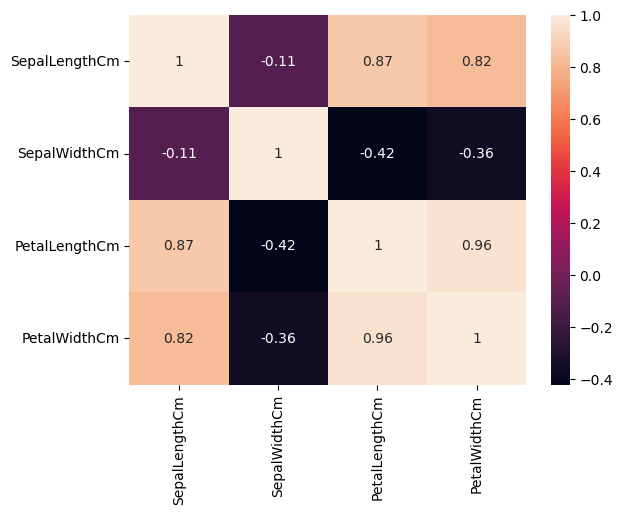

In [10]:
#heatmap for the representing the correlation between variables
correlation = irisdata.corr()
s.heatmap(correlation, annot=True)
# Show the plots
plt.show()

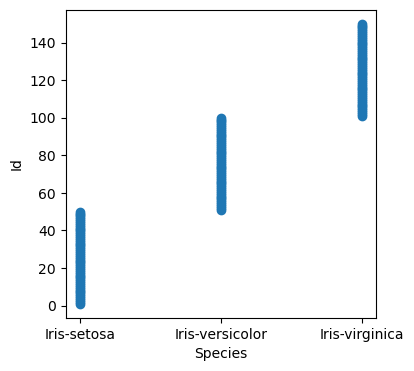

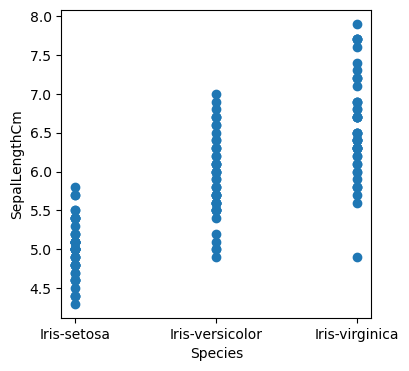

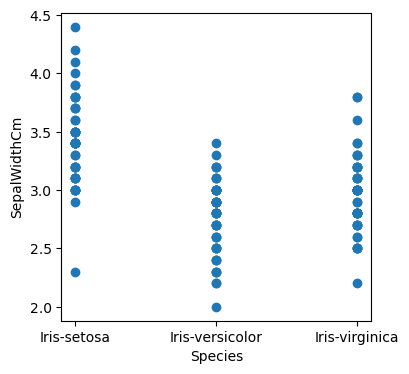

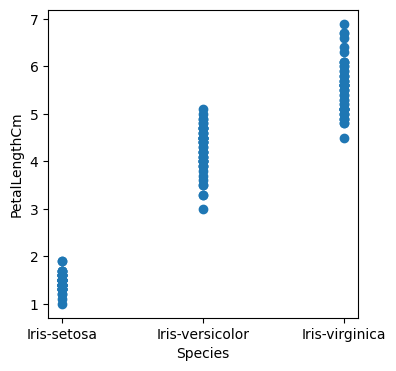

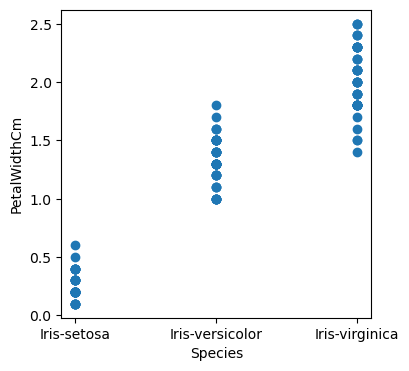

In [35]:
#scatterplot
for col in irisdata.columns:
    if col!='Species':
        fig, ax = plt.subplots(figsize=(4,4))
        ax.scatter(x = irisdata['Species'], y = irisdata[col])
        plt.xlabel("Species")
        plt.ylabel(col)
        plt.show()

In [11]:
#converting the categorical values to numerical
irisdata['Species']=irisdata['Species'].str.replace('Iris-setosa','0')
irisdata['Species']=irisdata['Species'].str.replace('Iris-versicolor','1')
irisdata['Species']=irisdata['Species'].str.replace('Iris-virginica','2')
irisdata['Species']=irisdata['Species'].astype(int)
irisdata.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
#representing the 5 rows of dataset
irisdata.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
#identifying the independent and dependent variables
indepvar=[]
for col in irisdata.columns:
    if col!='Species':
        indepvar.append(col)
tarvar='Species'
x=irisdata[indepvar]
y=irisdata[tarvar]

In [14]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [15]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
x_train=scal.fit_transform(x_train)
x_train=pd.DataFrame(x_train)
x_test=scal.fit_transform(x_test)
x_test=pd.DataFrame(x_test)

# Multi-Label Classification

[[19  0  0]
 [ 0 12  0]
 [ 0  1 13]]
Print Class: 0
TP=19, FN=0, TN=26, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=12, FN=0, TN=32, FP=1
Accuracy: 0.978
Precision: 0.923
Sensitivity: 1.0
F1-Score: 0.96
Specificity: 0.97
Balanced Accuracy: 0.985
MCC: 0.946

Print Class: 2
TP=13, FN=1, TN=31, FP=0
Accuracy: 0.978
Precision: 1.0
Sensitivity: 0.929
F1-Score: 0.963
Specificity: 1.0
Balanced Accuracy: 0.964
MCC: 0.948

Overall Performance Prediction:
Accuracy: 98.5333%
Precision: 97.4333%
Recall or Sensitivity: 97.6333%
F1-Score: 0.9743
Specificity or True Nagative Rate: 99.0%
Balanced Accuracy: 98.3%

MCC: 0.9647

roc_auc_score: 1.0


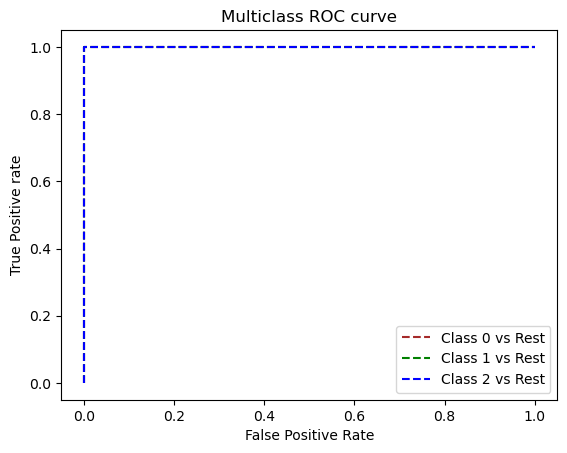

In [16]:
# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create an object for model

MHealthLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0)

# Train the model with training data

MHealthLR = MHealthLR.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthLR.predict(x_test)
y_pred_prob = MHealthLR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0,1,2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# DecisionTreeClassifier

[[19  0  0]
 [ 0  7  0]
 [ 0  6 13]]
Print Class: 0
TP=19, FN=0, TN=26, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=7, FN=0, TN=32, FP=6
Accuracy: 0.867
Precision: 0.538
Sensitivity: 1.0
F1-Score: 0.7
Specificity: 0.842
Balanced Accuracy: 0.921
MCC: 0.673

Print Class: 2
TP=13, FN=6, TN=26, FP=0
Accuracy: 0.867
Precision: 1.0
Sensitivity: 0.684
F1-Score: 0.812
Specificity: 1.0
Balanced Accuracy: 0.842
MCC: 0.746

Overall Performance Prediction:
Accuracy: 91.1333%
Precision: 84.6%
Recall or Sensitivity: 89.4667%
F1-Score: 0.8373
Specificity or True Nagative Rate: 94.7333%
Balanced Accuracy: 92.1%

MCC: 0.8063

roc_auc_score: 0.892


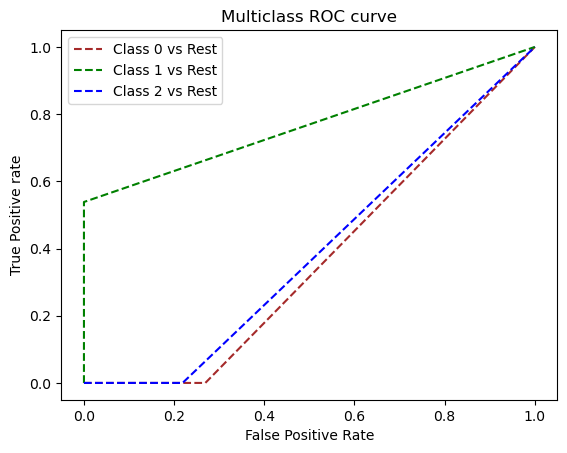

In [20]:
# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.tree import DecisionTreeClassifier

# Create an object for model

MHealthDT = DecisionTreeClassifier()

# Train the model with training data

MHealthDT = MHealthDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthDT.predict(x_test)
y_pred_prob = MHealthDT.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,1], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# RandomForestClassifier

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Print Class: 0
TP=19, FN=0, TN=26, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=13, FN=0, TN=32, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 2
TP=13, FN=0, TN=32, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Overall Performance Prediction:
Accuracy: 100.0%
Precision: 100.0%
Recall or Sensitivity: 100.0%
F1-Score: 1.0
Specificity or True Nagative Rate: 100.0%
Balanced Accuracy: 100.0%

MCC: 1.0

roc_auc_score: 1.0


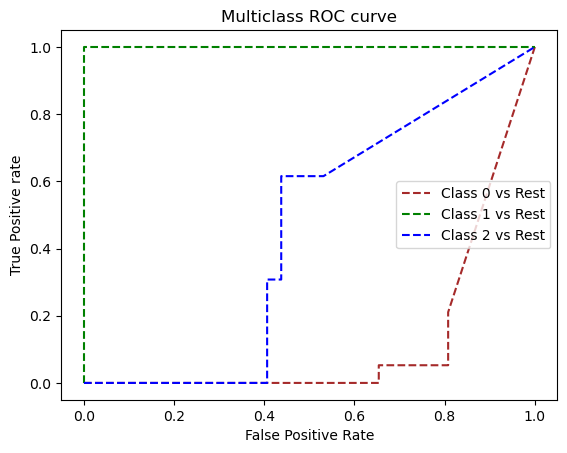

In [21]:
# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.ensemble import RandomForestClassifier

# Create an object for model

MHealthRF = RandomForestClassifier()

# Train the model with training data

MHealthRF = MHealthRF.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthRF.predict(x_test)
y_pred_prob = MHealthRF.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,1], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# ExtraTreesClassifier

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Print Class: 0
TP=19, FN=0, TN=26, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=13, FN=0, TN=32, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 2
TP=13, FN=0, TN=32, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Overall Performance Prediction:
Accuracy: 100.0%
Precision: 100.0%
Recall or Sensitivity: 100.0%
F1-Score: 1.0
Specificity or True Nagative Rate: 100.0%
Balanced Accuracy: 100.0%

MCC: 1.0

roc_auc_score: 1.0


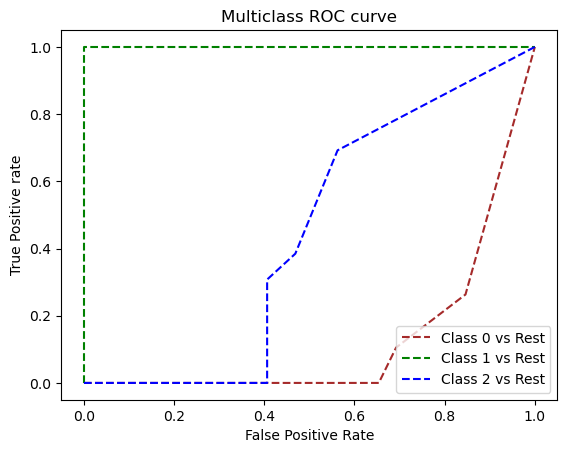

In [22]:
# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.ensemble import ExtraTreesClassifier

# Create an object for model

MHealthET = ExtraTreesClassifier()

# Train the model with training data

MHealthET = MHealthET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthET.predict(x_test)
y_pred_prob = MHealthET.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,1], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

In [24]:
#display the final results of the dataset

Results=pd.DataFrame({'Species_A':y_test,'Species_P':y_pred})
ResultsFinal=irisdata.merge(Results,left_index=True,right_index=True)
ResultsFinal.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_A,Species_P
51,6.4,3.2,4.5,1.5,1,1,1
118,7.7,2.6,6.9,2.3,2,2,2
36,5.5,3.5,1.3,0.2,0,0,0
32,5.2,4.1,1.5,0.1,0,0,0
69,5.6,2.5,3.9,1.1,1,1,1


# KNeighborsClassifier

[[19  0  0]
 [ 0 12  0]
 [ 0  1 13]]
Print Class: 0
TP=19, FN=0, TN=26, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=12, FN=0, TN=32, FP=1
Accuracy: 0.978
Precision: 0.923
Sensitivity: 1.0
F1-Score: 0.96
Specificity: 0.97
Balanced Accuracy: 0.985
MCC: 0.946

Print Class: 2
TP=13, FN=1, TN=31, FP=0
Accuracy: 0.978
Precision: 1.0
Sensitivity: 0.929
F1-Score: 0.963
Specificity: 1.0
Balanced Accuracy: 0.964
MCC: 0.948

Overall Performance Prediction:
Accuracy: 98.5333%
Precision: 97.4333%
Recall or Sensitivity: 97.6333%
F1-Score: 0.9743
Specificity or True Nagative Rate: 99.0%
Balanced Accuracy: 98.3%

MCC: 0.9647

roc_auc_score: 1.0


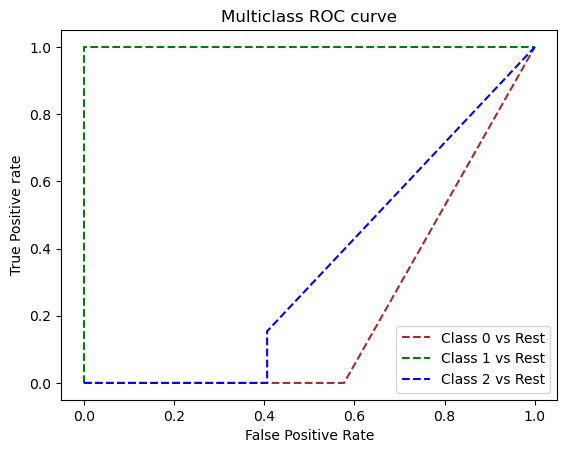

In [25]:
# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.neighbors import KNeighborsClassifier

# Create an object for model

ModelKNN  = KNeighborsClassifier()

# Train the model with training data

ModelKNN = ModelKNN.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelKNN.predict(x_test)
y_pred_prob = ModelKNN.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,1], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# SVC

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Print Class: 0
TP=19, FN=0, TN=26, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=13, FN=0, TN=32, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 2
TP=13, FN=0, TN=32, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Overall Performance Prediction:
Accuracy: 100.0%
Precision: 100.0%
Recall or Sensitivity: 100.0%
F1-Score: 1.0
Specificity or True Nagative Rate: 100.0%
Balanced Accuracy: 100.0%

MCC: 1.0

roc_auc_score: 1.0


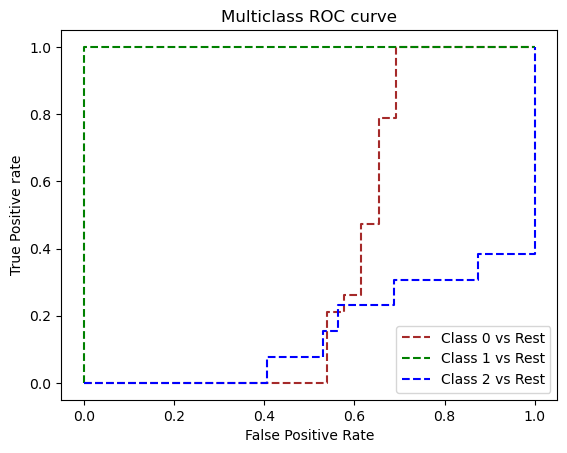

In [26]:
# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.svm import SVC

# Create an object for model

SVM  = SVC(probability=True)

# Train the model with training data

SVM = SVM.fit(x_train,y_train)

# Predict the model with test data set

y_pred = SVM.predict(x_test)
y_pred_prob = SVM.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,1], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# GaussianNB

[[19  0  0]
 [ 0 12  0]
 [ 0  1 13]]
Print Class: 0
TP=19, FN=0, TN=26, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=12, FN=0, TN=32, FP=1
Accuracy: 0.978
Precision: 0.923
Sensitivity: 1.0
F1-Score: 0.96
Specificity: 0.97
Balanced Accuracy: 0.985
MCC: 0.946

Print Class: 2
TP=13, FN=1, TN=31, FP=0
Accuracy: 0.978
Precision: 1.0
Sensitivity: 0.929
F1-Score: 0.963
Specificity: 1.0
Balanced Accuracy: 0.964
MCC: 0.948

Overall Performance Prediction:
Accuracy: 98.5333%
Precision: 97.4333%
Recall or Sensitivity: 97.6333%
F1-Score: 0.9743
Specificity or True Nagative Rate: 99.0%
Balanced Accuracy: 98.3%

MCC: 0.9647

roc_auc_score: 1.0


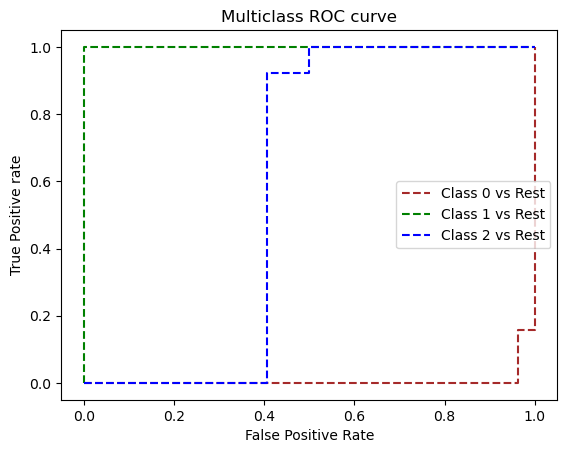

In [27]:
# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.naive_bayes import GaussianNB

# Create an object for model

ModelGNB  = GaussianNB()

# Train the model with training data

ModelGNB = ModelGNB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelGNB.predict(x_test)
y_pred_prob = ModelGNB.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,1], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

In [29]:
EMResults=pd.read_csv(r"C:\Users\Maha\Downloads\EMResults .csv")
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Comparing all the Algorithms

Model Name:  LogisticRegression()
[[19  0  0]
 [ 0  9  0]
 [ 0  4 13]]
Print Class: 0
TP=19, FN=0, TN=26, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=9, FN=0, TN=32, FP=4
Accuracy: 0.911
Precision: 0.692
Sensitivity: 1.0
F1-Score: 0.818
Specificity: 0.889
Balanced Accuracy: 0.944
MCC: 0.784

Print Class: 2
TP=13, FN=4, TN=28, FP=0
Accuracy: 0.911
Precision: 1.0
Sensitivity: 0.765
F1-Score: 0.867
Specificity: 1.0
Balanced Accuracy: 0.883
MCC: 0.818

Overall Performance Prediction:
Accuracy: 94.0667%
Precision: 89.7333%
Recall or Sensitivity: 92.1667%
F1-Score: 0.895
Specificity or True Nagative Rate: 96.3%
Balanced Accuracy: 94.2333%

MCC: 0.8673

roc_auc_score: 0.997
-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
[[19  0  0]
 [ 0  7  0]
 [ 0  6 13]]
Print Class: 0
TP=19, FN=0, TN=26, FP=0
Accuracy: 1.0
Prec

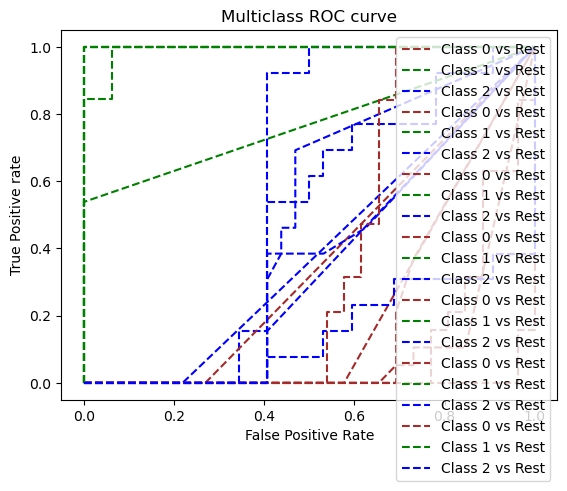

In [30]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDT = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
MM = [ModelLR, ModelDT, ModelRF, ModelET,ModelKNN, ModelGNB, ModelSVM]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    
    # confusion matrix in sklearn

    from sklearn.metrics import multilabel_confusion_matrix
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from math import sqrt

    print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

    # Actual and predicted classes

    lst_actual_class = y_test
    lst_predicted_class = y_pred
    lst_predicted_prob_class = y_pred_prob

    # Class = Label 0-12

    lst_classes = [0, 1, 2]

    # Compute multi-class confusion matrix

    arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

    # Temp store results

    model_acc = [];
    model_recall = [];
    model_prec = [];
    model_fscore = [];
    model_spec = [];
    model_bal_acc = [];
    model_mcc = [];
    for no_class in range(len(lst_classes)):
        arr_data = arr_out_matrix[no_class];
        print("Print Class: {0}".format(no_class));

        tp = arr_data[1][1]
        fn = arr_data[0][1]
        tn = arr_data[0][0]
        fp = arr_data[1][0]
    
        sensitivity = round(tp/(tp+fn), 3);
        specificity = round(tn/(tn+fp), 3);
        accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
        balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
        precision = round(tp/(tp+fp), 3);
        f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
        mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
        MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
        model_acc.append(accuracy);
        model_prec.append(precision);
        model_recall.append(sensitivity);
        model_fscore.append(f1Score);
        model_spec.append(specificity);
        model_bal_acc.append(balanced_accuracy);
        model_mcc.append(MCC);
    
        print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
        print("Accuracy: {0}".format(accuracy));    # Accuracy score
        print("Precision: {0}".format(precision)); # Precision score
        print("Sensitivity: {0}".format(sensitivity)); # Recall score
        print("F1-Score: {0}".format(f1Score)); # F1 score
        print("Specificity: {0}".format(specificity)); # True Nagative Rate
        print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
        print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
    from statistics import mean
    import math

    print("Overall Performance Prediction:");
    print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
    print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
    print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
    print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
    print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
    print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
    print("MCC: {0}\n".format(round(mean(model_mcc), 4)))


    # ROC curve for Multi classes 
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.metrics import roc_curve, roc_auc_score

    fpr = {}
    tpr = {}
    thresh ={}

    n_class = 3

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,1], pos_label=i)
    
    # plotting    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

    print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', average='weighted'),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [31]:
#Display the results of first 10 records of dataset

EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),13,4,0,28,0.911,1.0,0.765,0.867,1.0,0.818,0.996581,0.883
1,DecisionTreeClassifier(),13,6,0,26,0.867,1.0,0.684,0.812,1.0,0.746,0.892308,0.842
2,"(DecisionTreeClassifier(max_features='sqrt', r...",13,0,0,32,1.000,1.0,1.000,1.000,1.0,1.000,1.000000,1.000
3,"(ExtraTreeClassifier(random_state=562908958), ...",13,0,0,32,1.000,1.0,1.000,1.000,1.0,1.000,1.000000,1.000
4,KNeighborsClassifier(),13,1,0,31,0.978,1.0,0.929,0.963,1.0,0.948,1.000000,0.964
5,GaussianNB(),13,1,0,31,0.978,1.0,0.929,0.963,1.0,0.948,1.000000,0.964
6,SVC(probability=True),13,0,0,32,1.000,1.0,1.000,1.000,1.0,1.000,1.000000,1.000


In [32]:
#Selected the RandomForest as best model because, it gave  the best results

y_predRF=ModelRF.predict(x_test)

In [33]:
#Merging the Predicted data to the main dataset

Results=pd.DataFrame({'Species_A':y_test,'Species_P':y_pred})

ResultsFinal=irisdata_bk.merge(Results,left_index=True,right_index=True)

ResultsFinal.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_A,Species_P
104,105,6.5,3.0,5.8,2.2,Iris-virginica,2,2
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2,2
18,19,5.7,3.8,1.7,0.3,Iris-setosa,0,0
55,56,5.7,2.8,4.5,1.3,Iris-versicolor,1,1
26,27,5.0,3.4,1.6,0.4,Iris-setosa,0,0
